# Building a program that uses the dual moving average crossover to determine when to buy and sell stocks

Trading strategies are usually verified by back testing: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed.

This way, you can get an idea of the effectiveness of your strategy, and you can use it as a starting point to optimize and improve your strategy before applying it to real markets.

This relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future.

And any strategy that has performed poorly in the past will probably also do badly in the future.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [17]:
df=pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-02,91.962502,92.617500,90.910004,91.027496,90.418251,114041600
1,2020-07-06,92.500000,93.945000,92.467499,93.462502,92.836960,118655600
2,2020-07-07,93.852501,94.654999,93.057503,93.172501,92.548889,112424400
3,2020-07-08,94.180000,95.375000,94.089996,95.342499,94.704369,117092000
4,2020-07-09,96.262497,96.317497,94.672501,95.752502,95.111641,125642800


In [18]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-06-28,133.410004,135.250000,133.350006,134.779999,134.779999,62063700
249,2021-06-29,134.800003,136.490005,134.350006,136.330002,136.330002,64556100
250,2021-06-30,136.169998,137.410004,135.869995,136.960007,136.960007,63261400
251,2021-07-01,136.600006,137.330002,135.759995,137.270004,137.270004,52433300
252,2021-07-02,137.899994,139.809998,137.744995,139.744995,139.744995,51758947


In [19]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [21]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,122.039259,123.467738,120.415741,121.976482,121.615627,1.195321e+08
std,11.151427,11.080783,11.064307,11.086283,11.215557,5.342286e+07
min,90.987503,92.617500,89.144997,91.027496,90.418251,4.669130e+07
25%,115.982498,117.279999,114.129997,115.750000,115.182587,8.400090e+07
50%,123.750000,125.180000,122.209999,123.750000,123.540001,1.051582e+08
75%,129.800003,131.449997,128.500000,130.360001,130.210007,1.447120e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,3.743368e+08


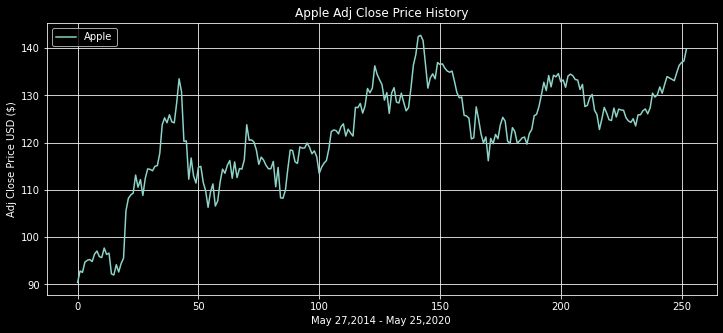

In [23]:

plt.figure(figsize=(12, 5))
plt.plot(df['Adj Close'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("May 27,2014 - May 25,2020 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [8]:
#creating amoving average with 30 days window
sms30=pd.DataFrame()
sms30['Adj Close']=df['Adj Close'].rolling(window=30).mean()
sms30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,128.169666
249,128.504999
250,128.908666
251,129.328000


In [9]:
#creating amoving average with 100 days window
sms100=pd.DataFrame()
sms100['Adj Close']=df['Adj Close'].rolling(window=30).mean()
sms100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,128.169666
249,128.504999
250,128.908666
251,129.328000


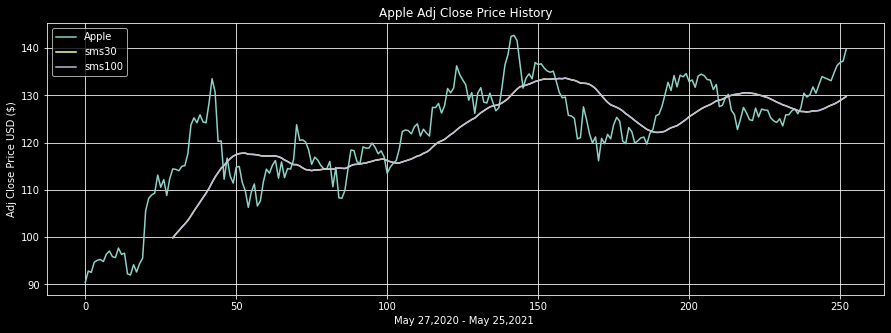

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df['Adj Close'],label='Apple')
plt.plot(sms30['Adj Close'],label='sms30')
plt.plot(sms100['Adj Close'],label='sms100')
plt.title('Apple Adj Close Price History')
plt.xlabel("May 27,2020 - May 25,2021 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [11]:
#new dataframe
data=pd.DataFrame()
data['Apple']=df['Adj Close']
data['sms30']=sms30['Adj Close']
data['sms100']=sms100['Adj Close']
data.head()

,Apple,sms30,sms100
0,90.418251,NaN,NaN
1,92.836960,NaN,NaN
2,92.548889,NaN,NaN
3,94.704369,NaN,NaN
4,95.111641,NaN,NaN


In [56]:
def buySell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
             if data ['SMA30'][i] > data['SMA100'][i]:
                    if flag != 1:
                        sigPriceBuy.append(data['apple'][i])
                        sigPriceSell.append(np.nan)
                        flag = 1
                    else:
                                sigPriceBuy.append(np.nan)
                                sigPriceSell.append(np.nan)
                               
                                
                            elif data['SMA30'][i] < data['SMA100'][i]:
                             if flag != 0:
                                     sigPriceBuy.append(np.nan)
                                        sigPriceSell.append(data['apple'][i])
                                        flag = 0
                                        
                    else:
                        sigPriceBuy.append(np.nan)
                        sigPriceSell.append(np.nan)
                        else:
                            sigPriceBuy.append(np.nan)
                            sigPriceSell.append(np.nan)
                            return(sigPriceBuy, sigPriceSell)
                          
                         
                         
        
                    
                 
               

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)